# Housing Price Project
## Overview
The goal of this project is to predict the housing sale prices in King County through a regression model. This prediction can give the seller and buyer an estimate of the housing price in King County and how specific features can affect the sale price. Based on this estimation, the buyers can find a house according to their budget, and the homeowners can get an evaluation of their house value, maybe renovate it before selling.


## Business Problem

The king county real estate agency will use this prediction model to give their clients an estimate of the housing price when purchasing or selling houses. The agency will estimate the price based on certain features like the location of the house, the number of bedrooms, and the size of the house.


## Data Understanding

The king county dataset was provided to me as part of this project by Flatiron School. The dataset consists of 21597 rows, 21 columns with different house features (continuous and categorical). These features will help to understand which factor will affect the selling price. Below is the description of each variable in the data frame:



- price - Price of the house sold, prediction target

- id - unique identified for a house

- date - the date when the house was sold
- bedrooms - number of bedrooms
- bathrooms - number of bathrooms
- sqft_living - square footage of the house’s interior living space
- sqft_lots - square footage of the land
- floors - number of floors
- waterfront - House which has a view to a waterfront
- view - Has been viewed by potential buyers
- condition - condition of the house coded from 1 to 5 where 1: Poor Worn out, and 5:Very Good
- grade - index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level of construction and design, and 11–13 have a high quality level of construction and design
- sqft_above  square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - the year where the house was built
- yr_renovated - Year when house was renovated, and if not 0
- zipcode - zip code
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors




In [1]:
# Imports the necessary libraries
import pandas as pd
import numpy as np
# Setting random seed for reproducibility
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# model tools
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.api import add_constant

import utils as ut

import warnings
warnings.filterwarnings('ignore')

/Users/karaoglan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/karaoglan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Obtain the data

In [2]:
# read in the data
df = pd.read_csv("/Users/karaoglan/Desktop/PHASE_2 PROJECT/kc_house_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#### - from the above data information, I noticed that the following:
#### - date in not in datetime format
#### - sqft_basement is an object need to see why and turn it to numerical

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


## Scrub the data


In [5]:
# check if we have duplicate house
df[['id']].duplicated().sum() # check if we have duplicate houses


177

In [6]:
df["id"].drop_duplicates(inplace=True) 


In [7]:
df["id"].duplicated().any() #sanity check


True

In [8]:
# check for null alues n the data
df.isnull().sum() # check for null values in the data


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# I'll check the null in waterfront and yr_renovated, and drop the view from the data
#because it is not important if the house was viewed or not

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
def waterfront11(x):
    if x == "NO":
        return 0
    if x == "YES":
        return 1
 # df[waterfront1] = np.where(df.waterfront == 'YES', 1, 0)

In [13]:
df["waterfront1"] = df["waterfront"].apply(waterfront11)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,NaN
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,NaN


In [14]:
df["waterfront1"] = df["waterfront1"].fillna(0)

In [15]:
df["waterfront1"].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront1, dtype: int64

In [16]:
df.drop("waterfront", axis=1,inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,Average,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,Average,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,Average,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,Average,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,Average,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [17]:
df['condition1'] = df['condition'].map(lambda x: len(x.split()))
df.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NONE,Average,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NONE,Average,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NaN,Average,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0.0,1
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NONE,Average,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0.0,1
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NONE,Average,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0,1


In [18]:
df.drop("condition", axis=1,inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [19]:
df.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [20]:
df["view"].value_counts(dropna=False)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [21]:
def view(x):
    if x == "NONE":
        return 0
    if x == "AVERAGE":
        return 2
    if x == "GOOD":
        return 3
    if x == "FAIR":
        return 1
    if x == "EXCELLENT":
        return 4

In [22]:
df["view"] = df["view"].apply(view)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [23]:
df.head(200)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7796450200,5/15/2014,256883.0,3,2.50,1690,5025,2.0,0.0,8 Good,...,0.0,2003,0.0,98023,47.2779,-122.347,2550,5001,0.0,1
196,7549802535,11/11/2014,423000.0,4,2.00,1970,6480,1.5,0.0,7 Average,...,840.0,1920,0.0,98108,47.5511,-122.312,1500,6480,0.0,2
197,3278600320,7/23/2014,465000.0,3,2.50,2150,4084,2.0,0.0,8 Good,...,0.0,2007,0.0,98126,47.5488,-122.372,1750,2385,0.0,1
198,2824079053,1/13/2015,440000.0,3,2.50,1910,66211,2.0,0.0,7 Average,...,0.0,1997,0.0,98024,47.5385,-121.911,2330,67268,0.0,1


In [24]:
df.grade=df.grade.replace(['7 Average','8 Good','9 Better','6 Low Average','10 Very Good','11 Excellent','5 Fair','12 Luxury','4 Low','13 Mansion','3 Poor'],
                [7,8,9,6,10,11,5,12,4,13,3])

In [25]:
df["grade"].value_counts(dropna=False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [26]:
df['grade'] = df['grade'].astype(float)


In [27]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [28]:
#df['grade'] = df['grade'].map(lambda x: len(x.split()))


In [29]:
df["grade"].value_counts(dropna=False)

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [30]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [31]:
df["yr_renovated"] = df["yr_renovated"].fillna(value = 0) 
# I filled the null with 0 because I think null here means not renovated
df["yr_renovated"].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [32]:
df["sqft_basement"].unique()
#checking what is making sqft_basement an object
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [33]:
df["sqft_basement"] = df["sqft_basement"].replace("?", 0).astype(float)
#replace the ? with 0 and change it to float type
df["sqft_basement"].value_counts()


0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [34]:
df.isnull().sum()
#sanity check

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
waterfront1       0
condition1        0
dtype: int64

In [35]:
df = df.drop(["id","date","view"], axis = 1)

# drop unwanted columns. id: there is no use of the id in the model,
#same as the selling date, and I don't need  view if the house has been viewed or not 


In [36]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.006760,1.078761
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,0.081944,0.269372
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,1.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,2.000000


In [37]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,221900.0,3,1.00,1180,5650,1.0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,538000.0,3,2.25,2570,7242,2.0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,180000.0,2,1.00,770,10000,1.0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,604000.0,4,3.00,1960,5000,1.0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,510000.0,3,2.00,1680,8080,1.0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,400000.0,4,2.50,2310,5813,2.0,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,402101.0,2,0.75,1020,1350,2.0,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,400000.0,3,2.50,1600,2388,2.0,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [38]:
#I will set a range for each feature and get rid of outliers, I will look at it through plots and the stat information
#from .describe

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

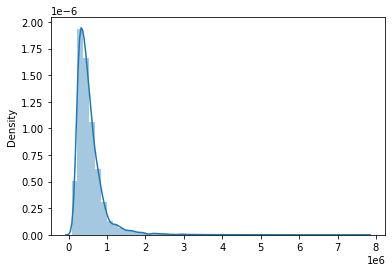

In [39]:
ut.plot(df,["price"])
df.price.describe()


In [40]:
df=df[(df['price'] < 12000000) & (df['price'] >100000)] # limiting my price range
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,221900.0,3,1.00,1180,5650,1.0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,538000.0,3,2.25,2570,7242,2.0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,180000.0,2,1.00,770,10000,1.0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,604000.0,4,3.00,1960,5000,1.0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,510000.0,3,2.00,1680,8080,1.0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,400000.0,4,2.50,2310,5813,2.0,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,402101.0,2,0.75,1020,1350,2.0,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,400000.0,3,2.50,1600,2388,2.0,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


<AxesSubplot:ylabel='Density'>

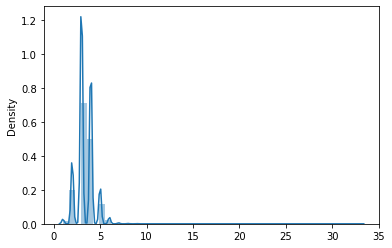

In [41]:
ut.plot(df,["bedrooms"])

In [42]:
df=df[(df['bedrooms']<6)]
# remove the outlier

<AxesSubplot:ylabel='Density'>

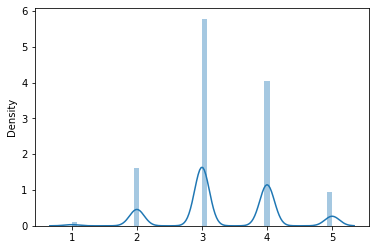

In [43]:
ut.plot(df,['bedrooms'])

<AxesSubplot:ylabel='Density'>

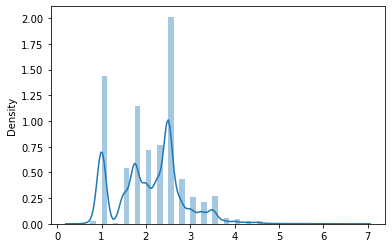

In [44]:
ut.plot(df,['bathrooms'])

In [45]:
df=df[(df['bathrooms']<4.5)]
#remove the outliner

<AxesSubplot:ylabel='Density'>

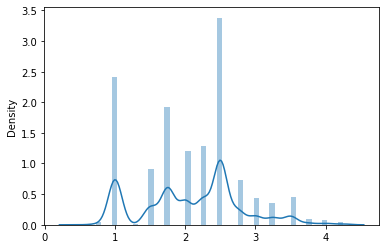

In [46]:
ut.plot(df,['bathrooms'])

<AxesSubplot:ylabel='Density'>

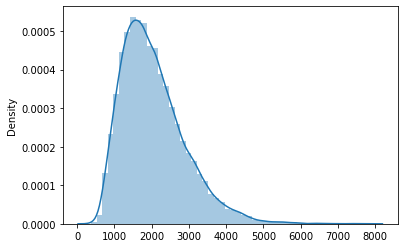

In [47]:
ut.plot(df,['sqft_living'])

In [48]:
df=df[(df["sqft_living"]<3500)]

<AxesSubplot:ylabel='Density'>

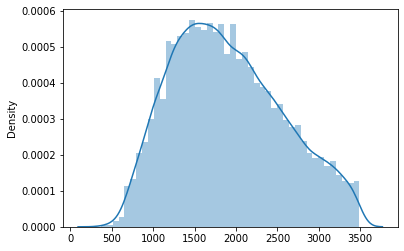

In [49]:
ut.plot(df,["sqft_living"])

<AxesSubplot:ylabel='Density'>

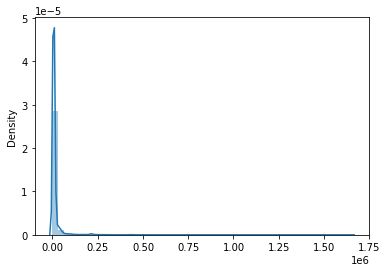

In [50]:
ut.plot(df,["sqft_lot"])

In [51]:
df=df[(df["sqft_lot"]<20000)]

<AxesSubplot:ylabel='Density'>

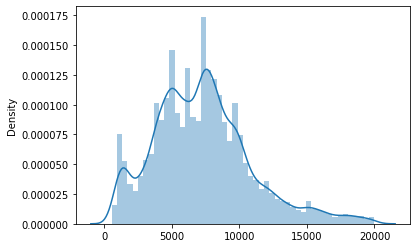

In [52]:
ut.plot(df,["sqft_lot"])

<AxesSubplot:ylabel='Density'>

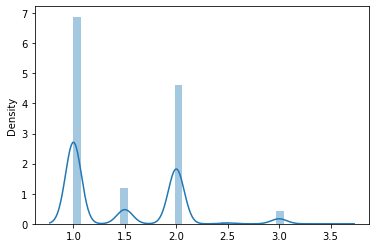

In [53]:
ut.plot(df,['floors'])

In [54]:
df=df[(df["floors"]<3.5)]

<AxesSubplot:ylabel='Density'>

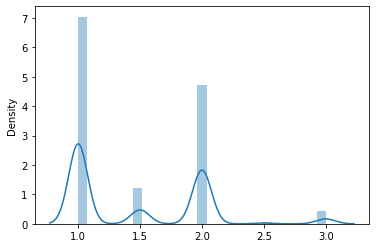

In [55]:
ut.plot(df,["floors"])

In [56]:
df["condition1"].unique()


array([1, 2])

list = []
for i in list:
    

df["grade"].unique()


<AxesSubplot:ylabel='Density'>

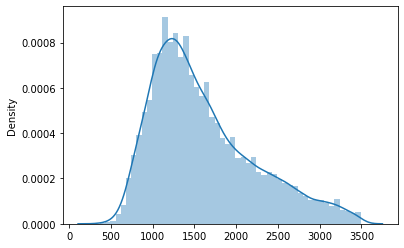

In [57]:
ut.plot(df,["sqft_above"])


In [58]:
df["sqft_above"].value_counts().sort_values(ascending=True)


1425      1
3087      1
2198      1
1333      1
2531      1
       ... 
1140    170
1220    179
1200    192
1300    196
1010    200
Name: sqft_above, Length: 658, dtype: int64

In [59]:
df=df[(df['sqft_above'] <2900)]


<AxesSubplot:ylabel='Density'>

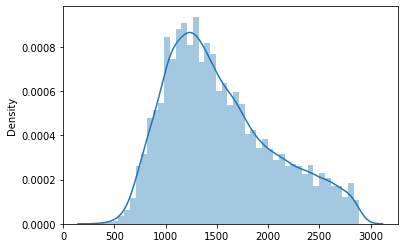

In [60]:
ut.plot(df,["sqft_above"])

<AxesSubplot:ylabel='Density'>

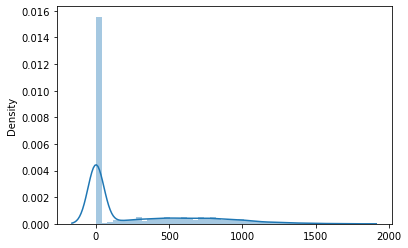

In [61]:
ut.plot(df,["sqft_basement"])

In [62]:
df["sqft_basement"].value_counts().sort_values(ascending=True)

248.0        1
295.0        1
283.0        1
266.0        1
207.0        1
         ...  
800.0      172
700.0      185
600.0      187
500.0      194
0.0      10363
Name: sqft_basement, Length: 208, dtype: int64

In [63]:
df=df[(df["sqft_basement"]<1200)]

<AxesSubplot:ylabel='Density'>

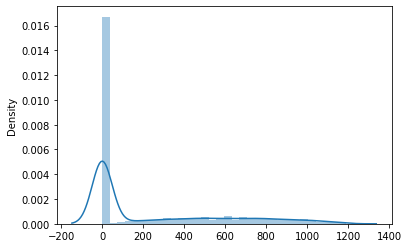

In [64]:
ut.plot(df,["sqft_basement"])

In [65]:
df["yr_built"].value_counts().sort_values(ascending=True)

1935     16
1934     16
1933     18
1902     25
1901     25
       ... 
2007    301
2003    305
1968    311
2005    314
2014    364
Name: yr_built, Length: 116, dtype: int64

<AxesSubplot:ylabel='Density'>

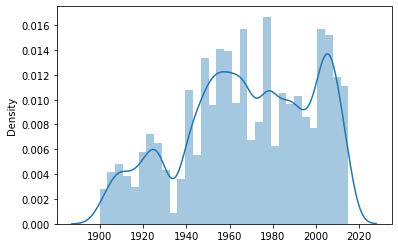

In [66]:
ut.plot(df,["yr_built"])

In [67]:
df["yr_renovated"].value_counts().sort_values(ascending=True)

1957.0        1
1934.0        1
1959.0        1
1944.0        1
1948.0        1
          ...  
2003.0       20
2005.0       22
2013.0       25
2014.0       60
0.0       16157
Name: yr_renovated, Length: 69, dtype: int64

In [68]:
df["renovated"]= df["yr_renovated"].apply(lambda x:1 if x!=0 else 0)
# assign the value in the "yr_renovated" columns to binary value if it is renovated or not,then drop "yr_renovated"


In [69]:
df["renovated"].value_counts()

0    16157
1      523
Name: renovated, dtype: int64

In [70]:
df =df.drop(["yr_renovated"],axis=1)

#drop "yr_renovated"

<AxesSubplot:ylabel='Density'>

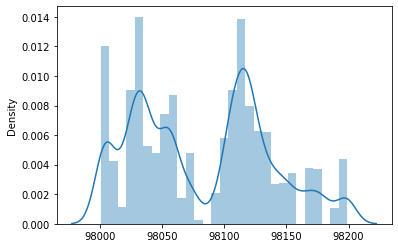

In [71]:
ut.plot(df,['zipcode'])

In [72]:
df['zipcode'].value_counts()

98103    573
98115    542
98117    524
98133    467
98118    466
        ... 
98014     50
98077     29
98070     28
98024     25
98039     16
Name: zipcode, Length: 70, dtype: int64

In [73]:
df['zipcode'].nunique()

70

<AxesSubplot:ylabel='Density'>

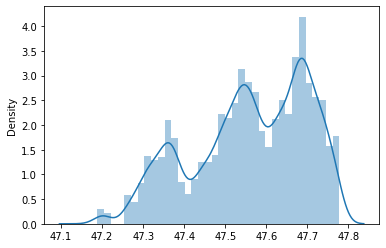

In [74]:
ut.plot(df,['lat'])

<AxesSubplot:ylabel='Density'>

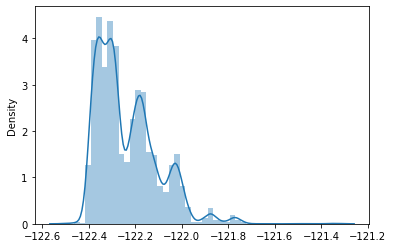

In [75]:
ut.plot(df,['long'])

<AxesSubplot:ylabel='Density'>

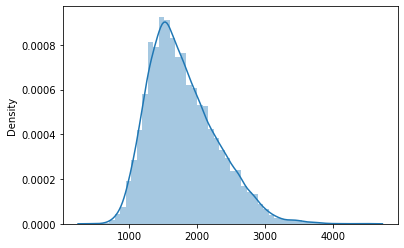

In [76]:
ut.plot(df,['sqft_living15'])

In [77]:
df=df[(df['sqft_living15']<3400)]

<AxesSubplot:ylabel='Density'>

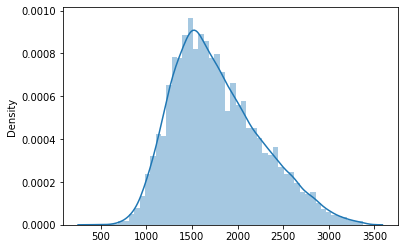

In [78]:
ut.plot(df,['sqft_living15'])

<AxesSubplot:ylabel='Density'>

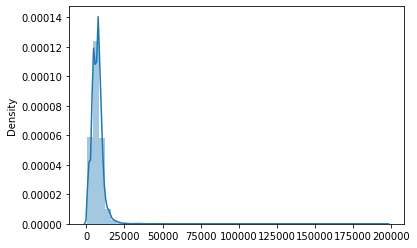

In [79]:
ut.plot(df,["sqft_lot15"])

In [80]:
df=df[(df["sqft_lot15"]<8000)]

<AxesSubplot:ylabel='Density'>

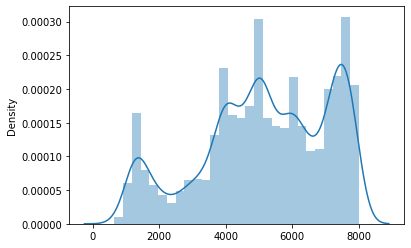

In [81]:
ut.plot(df,["sqft_lot15"])

## Explore the data

In [82]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1,renovated
count,1.061500e+04,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000
mean,4.666713e+05,3.123787,1.976613,1731.258691,5256.174282,1.558502,7.346302,1503.797833,221.992181,1967.656524,98092.313707,47.570276,-122.255244,1716.206029,5159.289779,0.000565,1.084786,0.033349
std,2.169005e+05,0.812062,0.687662,578.651917,2385.108910,0.569932,0.878366,537.862567,332.705675,34.739467,48.796489,0.128432,0.127860,463.885398,1921.950189,0.023769,0.278576,0.179555
min,1.025000e+05,1.000000,0.500000,370.000000,520.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,98001.000000,47.193400,-122.456000,620.000000,651.000000,0.000000,1.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1290.000000,3800.000000,1.000000,7.000000,1080.000000,0.000000,1941.000000,98045.000000,47.504900,-122.354000,1380.000000,4000.000000,0.000000,1.000000,0.000000
50%,4.250000e+05,3.000000,2.000000,1670.000000,5120.000000,1.500000,7.000000,1400.000000,0.000000,1970.000000,98107.000000,47.584000,-122.298000,1640.000000,5191.000000,0.000000,1.000000,0.000000
75%,5.659985e+05,4.000000,2.500000,2130.000000,7000.000000,2.000000,8.000000,1850.000000,420.000000,2003.000000,98122.000000,47.678800,-122.181000,1990.000000,6900.000000,0.000000,1.000000,0.000000
max,2.580000e+06,5.000000,4.250000,3490.000000,19969.000000,3.000000,11.000000,2890.000000,1190.000000,2015.000000,98199.000000,47.777500,-121.359000,3370.000000,7999.000000,1.000000,2.000000,1.000000


In [83]:
df.shape

(10615, 18)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10615 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          10615 non-null  float64
 1   bedrooms       10615 non-null  int64  
 2   bathrooms      10615 non-null  float64
 3   sqft_living    10615 non-null  int64  
 4   sqft_lot       10615 non-null  int64  
 5   floors         10615 non-null  float64
 6   grade          10615 non-null  float64
 7   sqft_above     10615 non-null  int64  
 8   sqft_basement  10615 non-null  float64
 9   yr_built       10615 non-null  int64  
 10  zipcode        10615 non-null  int64  
 11  lat            10615 non-null  float64
 12  long           10615 non-null  float64
 13  sqft_living15  10615 non-null  int64  
 14  sqft_lot15     10615 non-null  int64  
 15  waterfront1    10615 non-null  float64
 16  condition1     10615 non-null  int64  
 17  renovated      10615 non-null  int64  
dtypes: flo

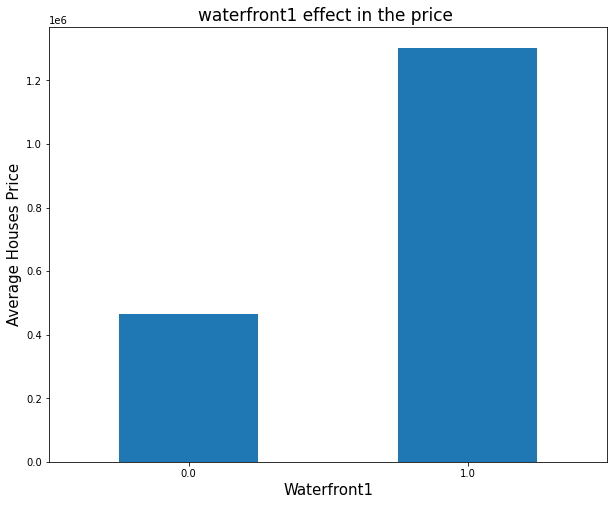

In [85]:
# plotting houses to the mean of price
df.groupby("waterfront1")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront1 effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront1",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

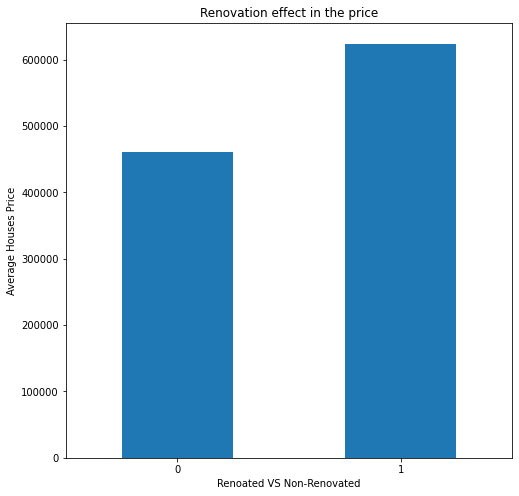

In [86]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price")
plt.ylabel("Average Houses Price")
plt.xlabel("Renoated VS Non-Renovated")
plt.xticks(rotation=0)


#the renovated houses selling price is higher than non-renovated one



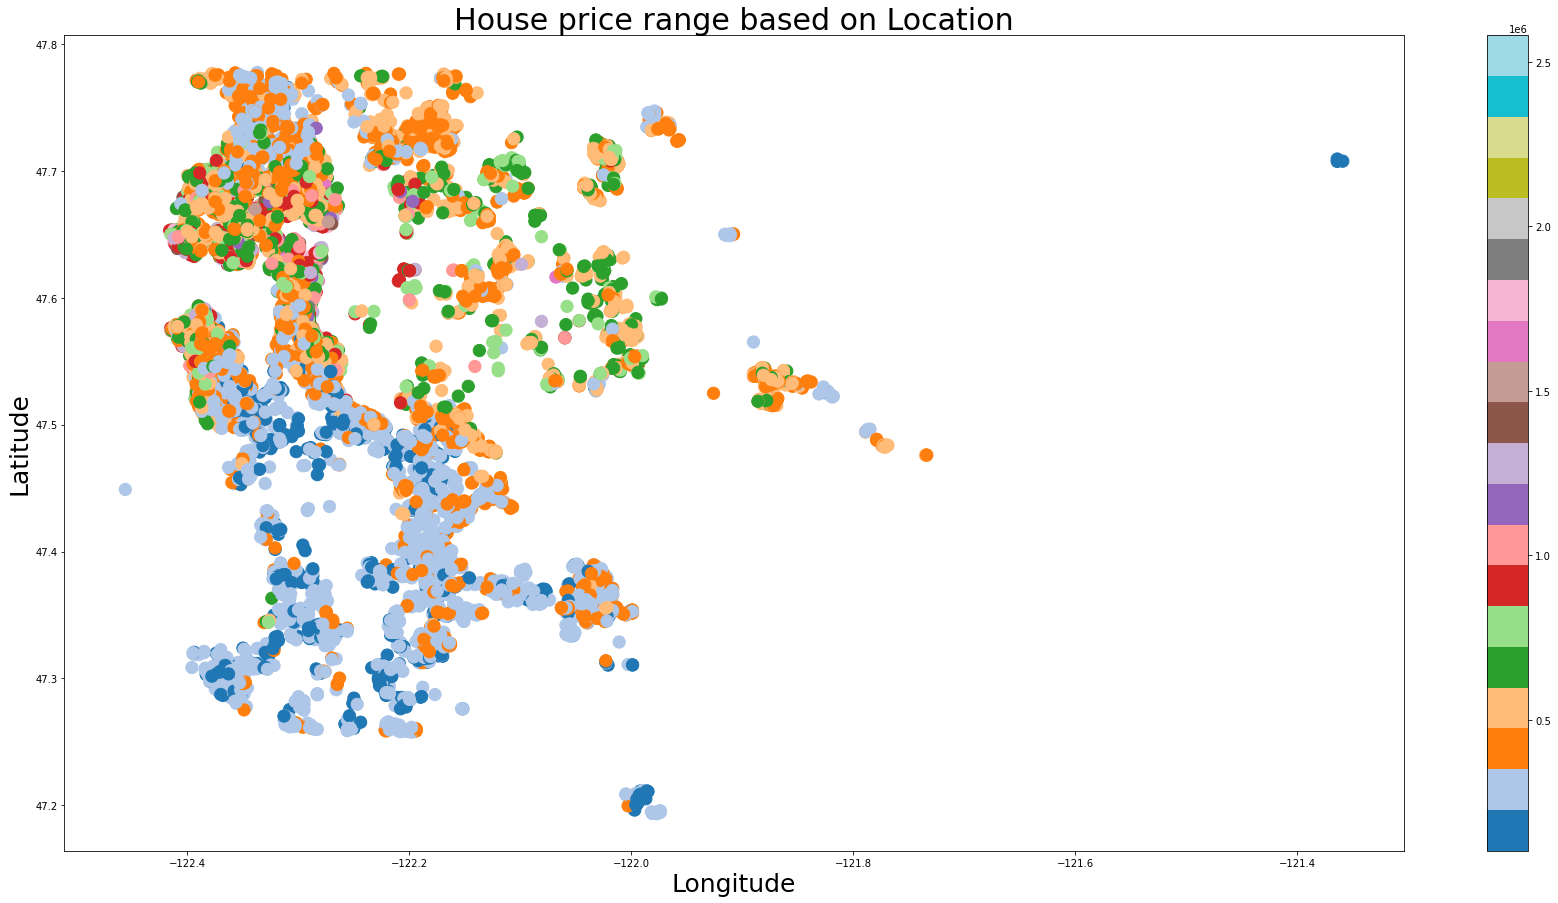

In [87]:
#Visualizing Longitude to Latitude to check how the price vary by location

plt.figure(figsize=(30,15))
plt.scatter(x=df['long'], y=df['lat'], c =df["price"], cmap='tab20',marker='o', s=150)
plt.title("House price range based on Location", fontsize=30)
plt.xlabel('Longitude', fontsize=25)
plt.ylabel("Latitude", fontsize=25)
plt.colorbar()
plt.show()
# #visualize relationships between numeric columns
#sns.pairplot(df)

In [88]:
#check for multicollinearity between other variables
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1,renovated
price,1.000000,0.217521,0.317398,0.524076,-0.121710,0.200429,0.545136,0.367155,0.307881,-0.148666,0.182910,0.449232,-0.147646,0.390753,-0.150082,0.091737,0.117260,0.135027
bedrooms,0.217521,1.000000,0.459538,0.620795,0.196718,0.161048,0.273676,0.513461,0.241146,0.122999,-0.157813,-0.126219,0.150634,0.374412,0.187530,-0.013388,0.050640,0.018854
bathrooms,0.317398,0.459538,1.000000,0.674968,-0.135715,0.545188,0.578527,0.611607,0.179640,0.546293,-0.240871,-0.090225,0.267481,0.473042,-0.148948,0.013778,-0.032313,0.034931
sqft_living,0.524076,0.620795,0.674968,1.000000,0.144007,0.317505,0.596887,0.821877,0.398600,0.251041,-0.174772,-0.057829,0.236029,0.670969,0.121196,0.020841,0.022928,0.054396
sqft_lot,-0.121710,0.196718,-0.135715,0.144007,1.000000,-0.460450,-0.163530,0.117604,0.058932,-0.168738,-0.173527,-0.216380,0.164471,0.147843,0.824229,-0.008168,0.043133,-0.000545
floors,0.200429,0.161048,0.545188,0.317505,-0.460450,1.000000,0.500605,0.511201,-0.267215,0.541077,-0.118175,0.007585,0.145409,0.241927,-0.485805,0.014946,-0.136871,-0.015384
grade,0.545136,0.273676,0.578527,0.596887,-0.163530,0.500605,1.000000,0.595586,0.073305,0.438881,-0.102946,0.078070,0.120321,0.518422,-0.168457,0.017699,-0.095363,0.028321
sqft_above,0.367155,0.513461,0.611607,0.821877,0.117604,0.511201,0.595586,1.000000,-0.182957,0.412710,-0.325057,-0.152803,0.411672,0.672134,0.095849,0.017592,-0.086957,0.010027
sqft_basement,0.307881,0.241146,0.179640,0.398600,0.058932,-0.267215,0.073305,-0.182957,1.000000,-0.224347,0.216647,0.141168,-0.247692,0.079322,0.054436,0.008197,0.173198,0.075898
yr_built,-0.148666,0.122999,0.546293,0.251041,-0.168738,0.541077,0.438881,0.412710,-0.224347,1.000000,-0.387947,-0.238788,0.440128,0.271295,-0.156444,-0.000335,-0.266447,-0.201029


In [89]:
#set 0.75 high correlaion as a cut-off
abs(df.corr()) >0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


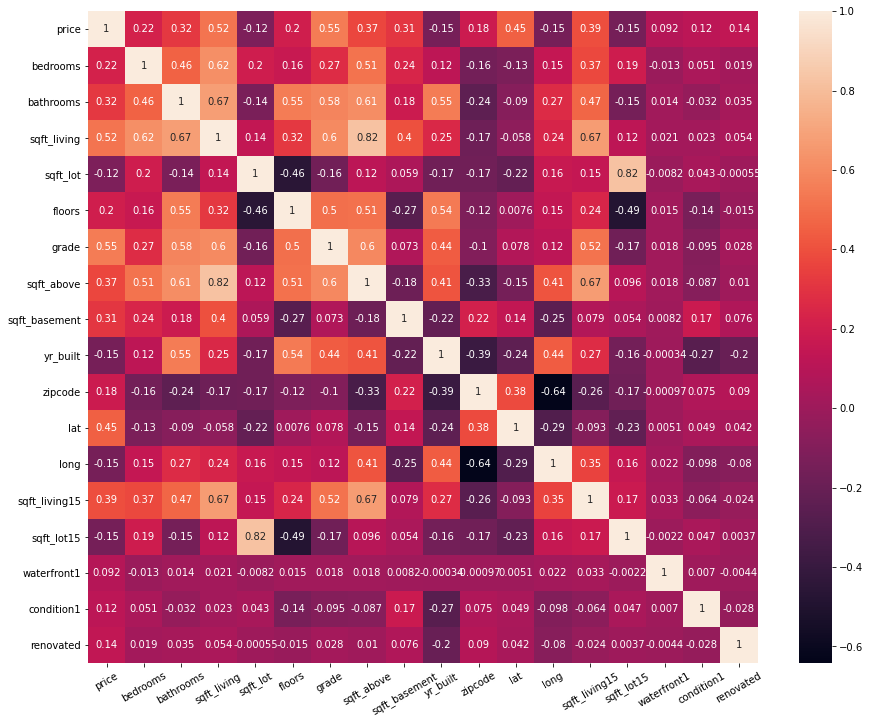

In [90]:
# visualize correlations between numeric columns to check if there is any multicollinearity between the variables
plt.figure(figsize=(15,12))
ax = sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=30)
plt.show()

In [91]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df3=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates.
df3.drop_duplicates(inplace=True)
df3.head(10)

,cc
pairs,
"(price, price)",1.000000
"(sqft_lot, sqft_lot15)",0.824229
"(sqft_living, sqft_above)",0.821877
"(sqft_living, bathrooms)",0.674968
"(sqft_living15, sqft_above)",0.672134
"(sqft_living15, sqft_living)",0.670969
"(long, zipcode)",0.642847
"(sqft_living, bedrooms)",0.620795
"(sqft_above, bathrooms)",0.611607


In [92]:
df3[(df3.cc>.75) & (df3.cc <1)]
#assingning the range for unwanted correlation

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.824229
"(sqft_living, sqft_above)",0.821877


In [93]:
df = df.drop(["sqft_lot15","sqft_above"],axis =1) 

# drop columns that cause high correlation so won't mess up my model
# for sqft_lot, sqft_lot15: i dropped sqft_lot15 because it makes more sense to drop The square footage of the 
#land lots of the nearest 15 neighbors
# for sqft_above, sqft_living: i dropped the sqft_above because the square footage of the house’s interior
#living space is more important than the qft_above basement

In [94]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,waterfront1,condition1,renovated
price,1.000000,0.217521,0.317398,0.524076,-0.121710,0.200429,0.545136,0.307881,-0.148666,0.182910,0.449232,-0.147646,0.390753,0.091737,0.117260,0.135027
bedrooms,0.217521,1.000000,0.459538,0.620795,0.196718,0.161048,0.273676,0.241146,0.122999,-0.157813,-0.126219,0.150634,0.374412,-0.013388,0.050640,0.018854
bathrooms,0.317398,0.459538,1.000000,0.674968,-0.135715,0.545188,0.578527,0.179640,0.546293,-0.240871,-0.090225,0.267481,0.473042,0.013778,-0.032313,0.034931
sqft_living,0.524076,0.620795,0.674968,1.000000,0.144007,0.317505,0.596887,0.398600,0.251041,-0.174772,-0.057829,0.236029,0.670969,0.020841,0.022928,0.054396
sqft_lot,-0.121710,0.196718,-0.135715,0.144007,1.000000,-0.460450,-0.163530,0.058932,-0.168738,-0.173527,-0.216380,0.164471,0.147843,-0.008168,0.043133,-0.000545
floors,0.200429,0.161048,0.545188,0.317505,-0.460450,1.000000,0.500605,-0.267215,0.541077,-0.118175,0.007585,0.145409,0.241927,0.014946,-0.136871,-0.015384
grade,0.545136,0.273676,0.578527,0.596887,-0.163530,0.500605,1.000000,0.073305,0.438881,-0.102946,0.078070,0.120321,0.518422,0.017699,-0.095363,0.028321
sqft_basement,0.307881,0.241146,0.179640,0.398600,0.058932,-0.267215,0.073305,1.000000,-0.224347,0.216647,0.141168,-0.247692,0.079322,0.008197,0.173198,0.075898
yr_built,-0.148666,0.122999,0.546293,0.251041,-0.168738,0.541077,0.438881,-0.224347,1.000000,-0.387947,-0.238788,0.440128,0.271295,-0.000335,-0.266447,-0.201029
zipcode,0.182910,-0.157813,-0.240871,-0.174772,-0.173527,-0.118175,-0.102946,0.216647,-0.387947,1.000000,0.381474,-0.642847,-0.259552,-0.000965,0.074526,0.089810


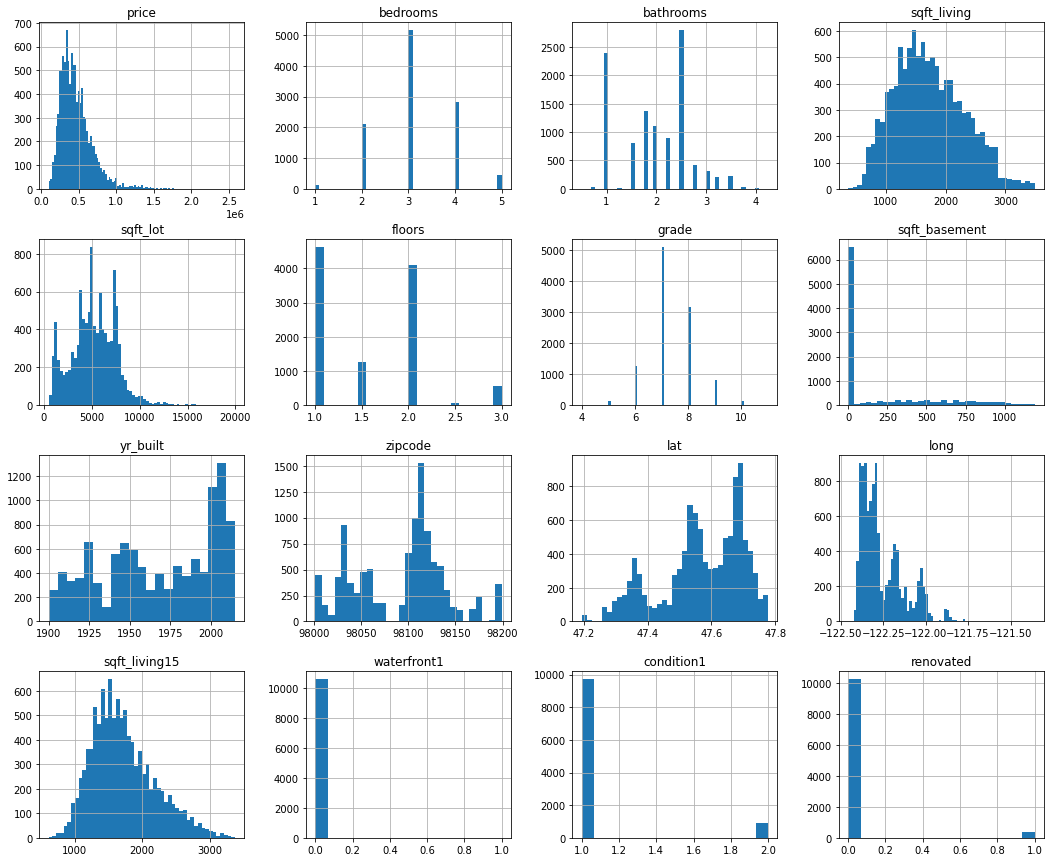

In [95]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');

## Model 1
### Baseline Model

In [96]:
# set  X and y
X = df.drop('price', axis=1)
y = df['price']


In [97]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from statsmodels.formula.api import ols

In [99]:
#X_train["bedrooms"]

In [100]:
#model = sm.OLS(y_train,sm.add_constant(X_train["bedrooms"],["bathrooms"])).fit()
#model.summary()
#X_train, X_test, y_train, y_test 


In [101]:
X_train_base = add_constant(X_train[["bedrooms","bathrooms"]])
X_test_base = add_constant(X_test[["bedrooms","bathrooms"]])
model = sm.OLS(y_train, X_train_base).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     523.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.58e-215
Time:                        10:25:43   Log-Likelihood:            -1.1588e+05
No. Observations:                8492   AIC:                         2.318e+05
Df Residuals:                    8489   BIC:                         2.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.156e+05   9210.246     23.410      0.000    1.98e+05    2.34e+05
bedrooms    2.504e+04   3077.336      8.136      0.000     1.9e+04    3.11e+04
bathrooms   8.708e+04   3630.444     23.986      0.000       8e+04    9.42e+04
==============================================================================
Omnibus:                     2467.345   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8375.044
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                       6.900   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
y_pred = model.predict(X_test_base)
error = y_pred - y_test  #error
abs_error = abs(y_pred - y_test)  # absolute error
mean_abs_error = abs_error.mean()
squared_error = error**2
mean_squared_error = squared_error.mean()
rmse = mean_squared_error ** 0.5

print('BASELINE  :','MAE:',mean_abs_error, 'MSE:', mean_squared_error, 'RMSE:', rmse)




BASELINE  : MAE: 155574.75782023964 MSE: 43250156697.37297 RMSE: 207966.72016785035


### MODEL 2. 
### Including all features

In [103]:
X_train_all = add_constant(X_train)
X_test_all = add_constant(X_test)
model_all = sm.OLS(y_train, X_train_all).fit()
print(model_all.summary())
y_pred_all=model_all.predict(X_test_all)

error_all = y_pred_all - y_test
squared_error_all = error_all**2
rmse_all = squared_error_all.mean() ** 0.5
mean_abs_error = abs_error.mean()


print('RMSE_all:', rmse_all, "MAE:" ,mean_abs_error)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1189.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:43   Log-Likelihood:            -1.1156e+05
No. Observations:                8492   AIC:                         2.232e+05
Df Residuals:                    8476   BIC:                         2.233e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.198e+07   3.19e+06    -10.009

## Dedected problems

In [104]:
# Detected Problems:
# 1 - Variable type : Numerical / Categorical / Ordinal
# 2 - Multicollinearity - there are the binaries you identified above -
# take only 1 of every 2 out there and use it
# 3 - Distributions of variables (dependent-independent) - try taking the logarithm of unsymmetrical variables
#- there are 2 important issues here
#- A -first you will take logarithm of price and try-
# - B - then just take the asymmetric variables and move forward by taking the inverse of the logarithm of the predictions
# there will be at least 6 models in total - their comparison is rmse and adjusted r-square


##  MODEL 2.A 
### PROBLEM 1 Categorical-Numerical

In [105]:
# Problem 1 
# Variable Types 1: Nominal, Ordinal, Interval, Ratio
# Variable Types 2: Categorical, Numerical

df.dtypes
df.describe()
# 1- Zipcode (omit or make dummy vars) 
#2- yr_built: calculate age 
#3- basement-dummify

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,waterfront1,condition1,renovated
count,1.061500e+04,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000
mean,4.666713e+05,3.123787,1.976613,1731.258691,5256.174282,1.558502,7.346302,221.992181,1967.656524,98092.313707,47.570276,-122.255244,1716.206029,0.000565,1.084786,0.033349
std,2.169005e+05,0.812062,0.687662,578.651917,2385.108910,0.569932,0.878366,332.705675,34.739467,48.796489,0.128432,0.127860,463.885398,0.023769,0.278576,0.179555
min,1.025000e+05,1.000000,0.500000,370.000000,520.000000,1.000000,4.000000,0.000000,1900.000000,98001.000000,47.193400,-122.456000,620.000000,0.000000,1.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1290.000000,3800.000000,1.000000,7.000000,0.000000,1941.000000,98045.000000,47.504900,-122.354000,1380.000000,0.000000,1.000000,0.000000
50%,4.250000e+05,3.000000,2.000000,1670.000000,5120.000000,1.500000,7.000000,0.000000,1970.000000,98107.000000,47.584000,-122.298000,1640.000000,0.000000,1.000000,0.000000
75%,5.659985e+05,4.000000,2.500000,2130.000000,7000.000000,2.000000,8.000000,420.000000,2003.000000,98122.000000,47.678800,-122.181000,1990.000000,0.000000,1.000000,0.000000
max,2.580000e+06,5.000000,4.250000,3490.000000,19969.000000,3.000000,11.000000,1190.000000,2015.000000,98199.000000,47.777500,-121.359000,3370.000000,1.000000,2.000000,1.000000


In [106]:
X_train_step1 = X_train.drop(columns = ['zipcode'])
X_train_step1['built_age'] = 2022 - X_train_step1.yr_built
X_train_step1['basement_dummy'] = np.where(X_train_step1.sqft_basement > 0 ,1 ,0)

X_train_step1 = X_train_step1.drop(columns = ['yr_built','sqft_basement'])

X_test_step1 = X_test.drop(columns = ['zipcode'])
X_test_step1['built_age'] = 2022 - X_test_step1.yr_built
X_test_step1['basement_dummy'] = np.where(X_test_step1.sqft_basement > 0 ,1 ,0)

X_test_step1 = X_test_step1.drop(columns = ['yr_built','sqft_basement'])

In [107]:
X_train_step1 = add_constant(X_train_step1)
X_test_step1 = add_constant(X_test_step1)
model_step1 = sm.OLS(y_train, X_train_step1).fit()
print(model_step1.summary())
y_pred_step1=model_step1.predict(X_test_step1)


error_step1 = y_pred_step1 - y_test
squared_error_step1 = error_step1**2
rmse_step1 = squared_error_step1.mean() ** 0.5
mean_abs_error = abs_error.mean()

print('RMSE_all:', rmse_step1, "MAE:", mean_abs_error)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1276.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:43   Log-Likelihood:            -1.1156e+05
No. Observations:                8492   AIC:                         2.231e+05
Df Residuals:                    8477   BIC:                         2.233e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.601e+07   1.67e+06    -21.

### 2.A.1 Second trial one-hot encoding(dummifyying zipcodes)

In [108]:

# Step1 Second trial
# One-hot encoding (dummifying zipcodes)
# set  X and y

zipcode_onehot = pd.get_dummies(df.zipcode) #Zipcode ( make dummy variable) 
z_colnames = ['zip_'+ str(i) for i in zipcode_onehot.columns] #One-hot encoding (dummifying zipcodes)
zipcode_onehot.columns = z_colnames
df_onehot = df.join(zipcode_onehot)

df_onehot = df_onehot.drop(columns = ['zipcode'])
df_onehot['built_age'] = 2022 - df_onehot.yr_built
df_onehot['basement_dummy'] = np.where(df_onehot.sqft_basement > 0 ,1 ,0)
df_onehot = df_onehot.drop(columns = ['yr_built','sqft_basement'])

X_oh = df_onehot.drop('price', axis=1)
y_oh = df_onehot['price']
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(X_oh, y_oh, test_size=0.2, random_state=42)
weird_zipcodes = [i for i in X_oh.columns if (X_train_oh[i].sum() == 0 or X_test_oh[i].sum() == 0)  ] # we control that train and test sets have houses from same zipcodes
X_train_oh = X_train_oh.drop(columns = weird_zipcodes)
X_test_oh = X_test_oh.drop(columns = weird_zipcodes)


X_train_oh = add_constant(X_train_oh)
X_test_oh = add_constant(X_test_oh)
model_step1_oh = sm.OLS(y_train_oh, X_train_oh).fit()
print(model_step1_oh.summary())
y_pred_step_oh=model_step1_oh.predict(X_test_oh)

error_step_oh = y_pred_step_oh - y_test
squared_error_step_oh = error_step_oh**2
rmse_step_oh = squared_error_step_oh.mean() ** 0.5
mean_abs_error = abs_error.mean()

print('RMSE_all:', rmse_step_oh,'MAE:', mean_abs_error)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     391.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:44   Log-Likelihood:            -1.0978e+05
No. Observations:                8492   AIC:                         2.197e+05
Df Residuals:                    8411   BIC:                         2.203e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.04e+07   8.95e+06      2.

## PROBLEM 2.B
### MULTICOLLINEARITY

In [109]:
# Trying to solve problem 2 - Multicollinearity
# pairs	
# (price, price)	1.000000
# (log_price, price)	0.949407
# (sqft_living, bathrooms)	0.674968
# (sqft_living15, sqft_living)	0.670969
# (long, zipcode)	0.642847
# (sqft_living, bedrooms)	0.620795
# (grade, sqft_living)	0.596887
# (grade, bathrooms)	0.578527
# (log_price, grade)	0.546385
# (yr_built, bathrooms)	0.546293

In [110]:
# log_y_train = np.log(y_train)
# log_y_test = np.log( y_test)

In [111]:
# model_step2 = sm.OLS(log_y_train, X_train_step2).fit()   
# print(model_step2.summary())

# y_pred_step2 = model_step2.predict(X_test_step2)
# error_step2 = y_pred_step2 - log_y_test


# # removing the log transformation
# y_pred_step2_transformed = np.exp(y_pred_step2)
# error_step2_transformed = y_pred_step2_transformed - y_test
# squared_error_step2 = error_step2_transformed**2
# rmse_step2 = squared_error_step2.mean() ** 0.5
# mean_abs_error = abs_error.mean()

# # print(y_pred_step2)
# # print(y_pred_step2_transformed)
# print('RMSE_all:', rmse_step3, 'MAE:', mean_abs_error)

In [112]:
X_train_step2 = X_train_step1.drop(columns = [ 'sqft_living15', 'sqft_lot','long','renovated'])
X_test_step2 = X_test_step1.drop(columns = ['sqft_living15', 'sqft_lot','long','renovated'])

In [113]:
X_train_step2 = add_constant(X_train_step2)
X_test_step2 = add_constant(X_test_step2)
model_step2 = sm.OLS(y_train, X_train_step2).fit()
print(model_step2.summary())
y_pred_step2=model_step2.predict(X_test_step2)


error_step2 = y_pred_step2 - y_test
squared_error_step2 = error_step2**2
rmse_step2 = squared_error_step2.mean() ** 0.5
mean_abs_error = abs_error.mean()

print('RMSE_all:', rmse_step2, 'MAE:', mean_abs_error)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:44   Log-Likelihood:            -1.1168e+05
No. Observations:                8492   AIC:                         2.234e+05
Df Residuals:                    8481   BIC:                         2.235e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.682e+07   5.45e+05    -49.

In [114]:



# # Step1 Second trial
# # One-hot encoding (dummifying zipcodes)
# # set  X and y

# zipcode_onehot = pd.get_dummies(df.zipcode)
# z_colnames = ['zip_'+ str(i) for i in zipcode_onehot.columns]
# zipcode_onehot.columns = z_colnames
# df_onehot = df.join(zipcode_onehot)

# df_onehot = df_onehot.drop(columns = ['zipcode'])
# df_onehot['built_age'] = 2022 - df_onehot.yr_built
# df_onehot['basement_dummy'] = np.where(df_onehot.sqft_basement > 0 ,1 ,0)
# df_onehot = df_onehot.drop(columns = ['yr_built','sqft_basement'])

# X_oh = df_onehot.drop('price', axis=1)
# y_oh = df_onehot['price']
# X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(X_oh, y_oh, test_size=0.2, random_state=42)
# weird_zipcodes = [i for i in X_oh.columns if (X_train_oh[i].sum() == 0 or X_test_oh[i].sum() == 0)  ] # we control that train and test sets have houses from same zipcodes
# X_train_oh = X_train_oh.drop(columns = weird_zipcodes)
# X_test_oh = X_test_oh.drop(columns = weird_zipcodes)


# X_train_oh = add_constant(X_train_oh)
# X_test_oh = add_constant(X_test_oh)
# model_step1_oh = sm.OLS(y_train_oh, X_train_oh).fit()
# print(model_step1_oh.summary())
# y_pred_step_oh=model_step1_oh.predict(X_test_oh)

# error_step_oh = y_pred_step_oh - y_test
# squared_error_step_oh = error_step_oh**2
# rmse_step_oh = squared_error_step_oh.mean() ** 0.5
# mean_abs_error = abs_error.mean()

# print('RMSE_all:', rmse_step_oh,'MAE:', mean_abs_error)

## PROBLEM 2.C
### Distributions of variables (dependent-independent)
#### log of unsymmetrical variables

In [115]:
# Solve PROBLEM3
log_y_train = np.log(y_train)
log_y_test = np.log( y_test)
# print(y_train)
# log_y_train

In [116]:
# df['log_price'] = np.log1p(df['price'])
#df['sqft_living15'] = np.log1p(df['sqft_living15'])
#df['sqft_lot'] = np.log1p(df['sqft_lot'])
#df['sqft_living'] = np.log1p(df['sqft_living'])
#df['bathrooms'] = np.log1p(df['bathrooms'])
#df['sqft_living15'] = np.log1p(df['sqft_living15'])
# df.hist(figsize  = [15, 15]);



In [117]:
model_step3 = sm.OLS(log_y_train, X_train_step2).fit()   #xtrain stepl aynisini kullaniyoruz cunku dependent vars
print(model_step3.summary())
y_pred_step3=model_step3.predict(X_test_step2)
error_step3 = y_pred_step3 - log_y_test

# removing the log transformation
y_pred_step3_transformed = np.exp(y_pred_step3)
error_step3_transformed = y_pred_step3_transformed - y_test
squared_error_step3 = error_step3_transformed**2
rmse_step3 = squared_error_step3.mean() ** 0.5
mean_abs_error = abs_error.mean()

# print(y_pred_step3)
# print(y_pred_step3_transformed)
print('RMSE_all:', rmse_step3, 'MAE:', mean_abs_error)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2087.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:44   Log-Likelihood:                 295.30
No. Observations:                8492   AIC:                            -568.6
Df Residuals:                    8481   BIC:                            -491.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -59.3206      1.022    -58.

In [118]:
model_step3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2087.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:44   Log-Likelihood:                 295.30
No. Observations:                8492   AIC:                            -568.6
Df Residuals:                    8481   BIC:                            -491.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -59.3206      1.022    -58.030      0.000     -61.324     -57.317
bedrooms          -0.0293      0.004     -7.176      0.000      -0.037      -0.021
bathrooms          0.0430      0.006      6.727      0.000       0.030       0.055
sqft_living        0.0003   7.58e-06     33.882      0.000       0.000       0.000
floors             0.0629      0.006     10.137      0.000       0.051       0.075
grade              0.1898      0.004     45.874      0.000       0.182       0.198
lat                1.4725      0.022     68.103      0.000       1.430       1.515
waterfront1        0.7701      0.117      6.582      0.000       0.541       0.999
condition1         0.0597      0.009      6.287      0.000       0.041       0.078
built_age          0.0041      0.000     38.893      0.000       0.004       0.004
basement_dummy     0.0358      0.006      6.039      0.000       0.024       0.047
==============================================================================
Omnibus:                      252.413   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.320
Skew:                          -0.267   Prob(JB):                     3.25e-92
Kurtosis:                       3.951   Cond. No.                     7.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

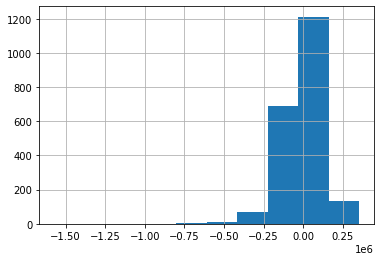

In [119]:
# checking error distributions - assumption
#model 4
error_step2.hist()

<AxesSubplot:>

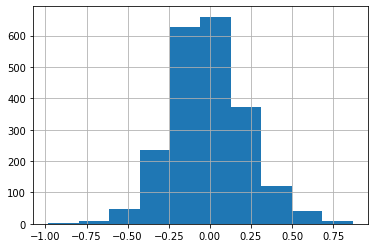

In [120]:
error_step3.hist()

In [121]:
# Instantiate a scaler
#scaler = StandardScaler()

# train on train data
#scaler.fit(X_train)
# transform both train and test data
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [122]:
# houses = df.drop(columns=['renovated',"condition1","waterfront1","sqft_living15","long","lat","yr_built","sqft_basement","grade","floors"]).copy()

# outcome = 'price'
# predictors = houses.drop(['price'], axis=1)
# pred_sum = "+".join(predictors.columns)
# formula = outcome + "~" + pred_sum
# mode = ols(formula = formula, data=houses).fit()
# mode.summary()

In [123]:
# mode.predict(houses)

In [124]:
# Instantiate a scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)
# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Instantiate a linear regression model
lr = LinearRegression()
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [126]:
y_train_pred2 = lr.predict(X_train_scaled)
y_test_pred2 = lr.predict(X_test_scaled)

In [127]:
# Evaluate
ut.evaluate_model(y_train, y_test, y_train_pred2, y_test_pred2)


Train R2: 0.678
Test R2: 0.663
---
Train MAE: 88818.999
Test MAE: 89774.669
---
Train RMSE: 122809.155
Test RMSE: 127050.132


In [128]:
#the baseline model can predict 67 % variance in the price and approximately my model is $88,000 off (MAE), 
#and for root square error we have about $125000 off because root square error is bigger than MAE

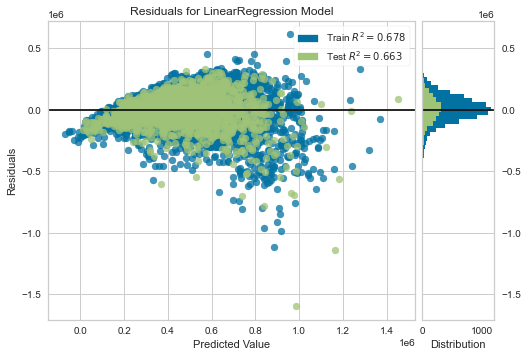

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [129]:
# visualizing our residuals
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)
#fit the traning data to the visualizer

visualizer.score(X_test_scaled, y_test)
#Evaluate the model on the test data
visualizer.show()


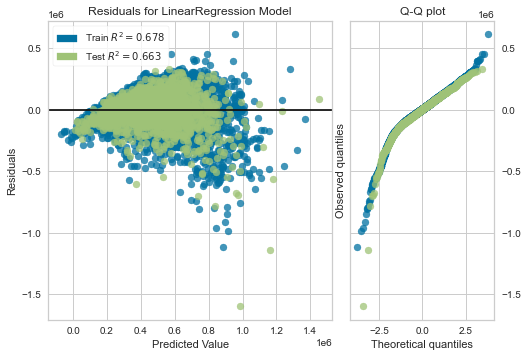

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [130]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [131]:
# The predicted values of the baseline model are not equally scattered, has a cone shape, so it is heteroscedastic


In [132]:
# examine the relationship of each of the following feature against the price by using regplot


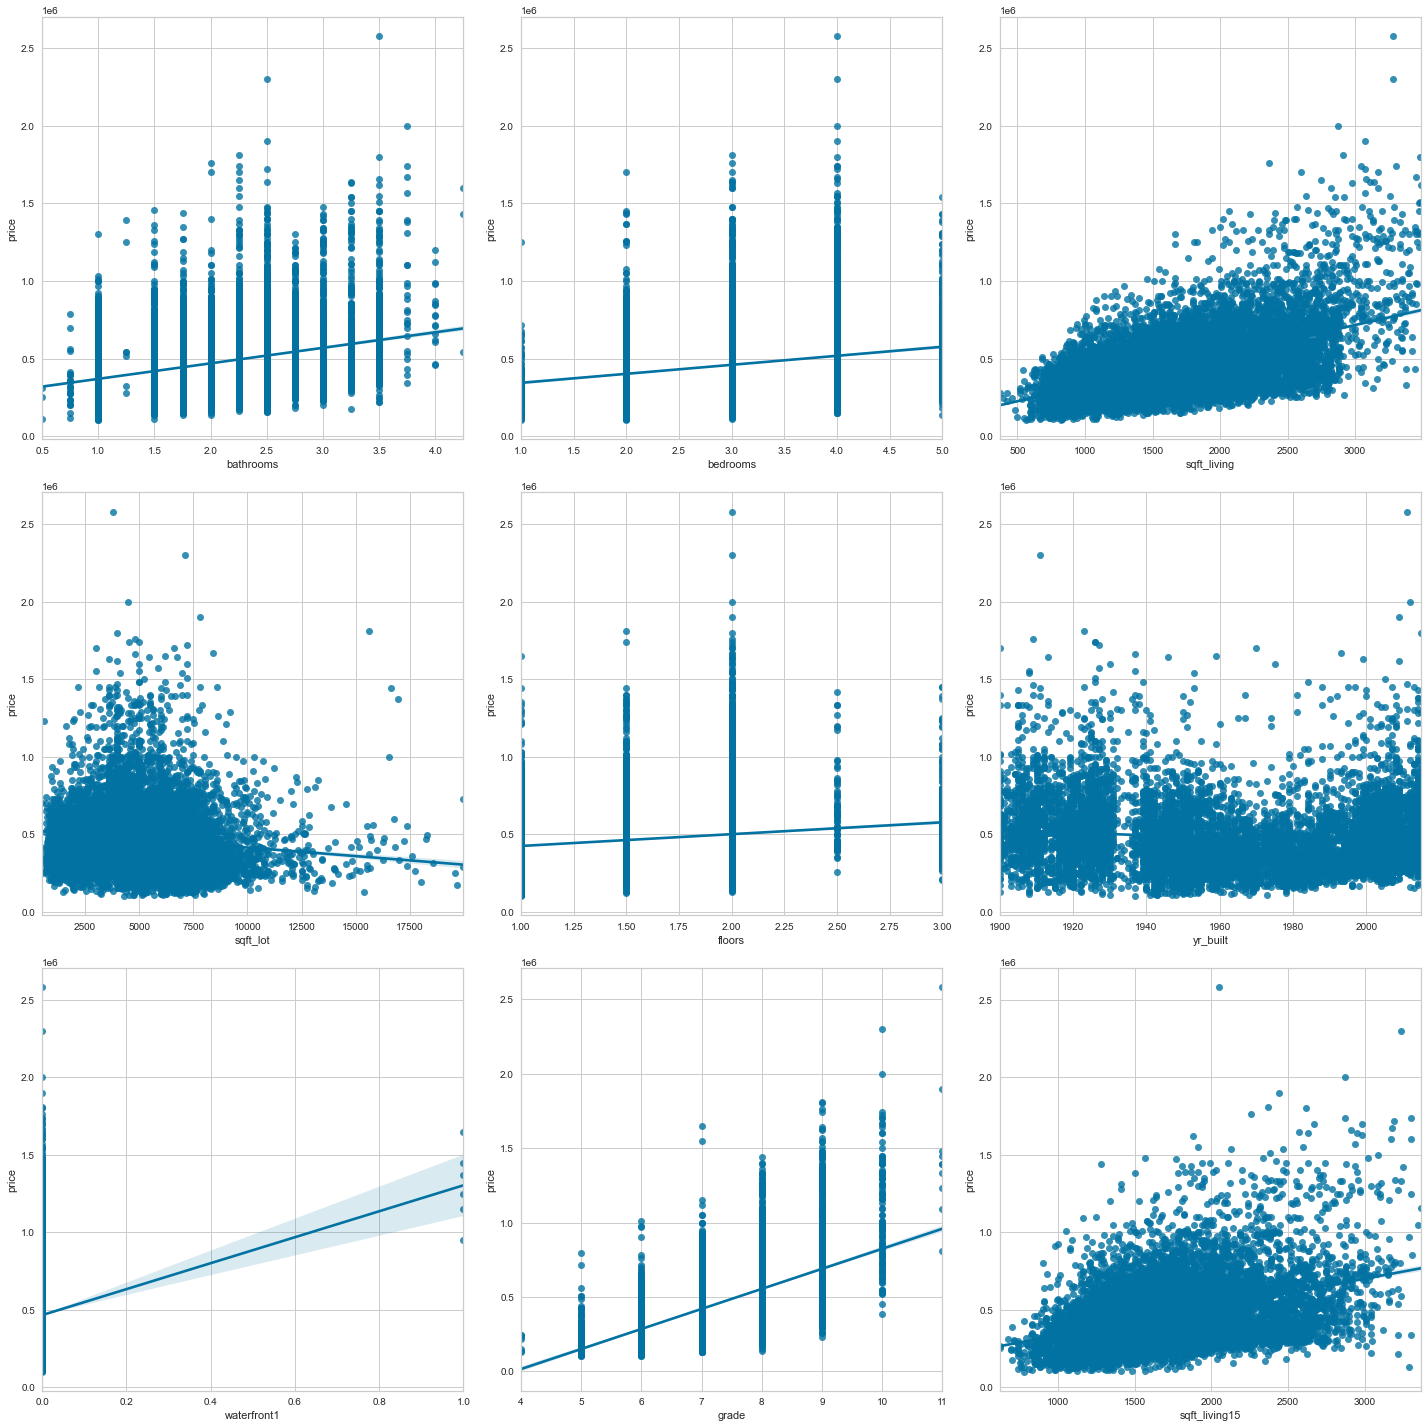

In [133]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = X['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = X['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = X['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = X['sqft_lot'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = X['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = X['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = X['waterfront1'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = X['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = X['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

## Interpretation of Regression Coefficients
### Feature Importances

Based on our latest model, we observed that p values above 0.05 were meaningless, and considering the coefficients, we found the strongest features.
- 1. lot
- 2. waterfront
- 3. floors
- 4. grade
- 5. condition
- 6. bathrooms
- Grade will increase the predicated price %180
- latitude will increase the predicated price %147
- Waterfront will increase the predicated price %77
- floors will increase the predicated price %6
- Bathrooms will increase the predicated price %2
- basement will increase the predicated price %3

the location of the house and the waterfront view seem to greaty affect the price of the house

## 1. Is there any relationship between the house’s location and its sale price?
The predicted price will increase with the increase in latitude and decrease in longitude and as the location move to the lower northwest with few scattered houses in the middle to east. These will help the buyer to get an estimate of the housing price range based on the location, and their allocated budget.



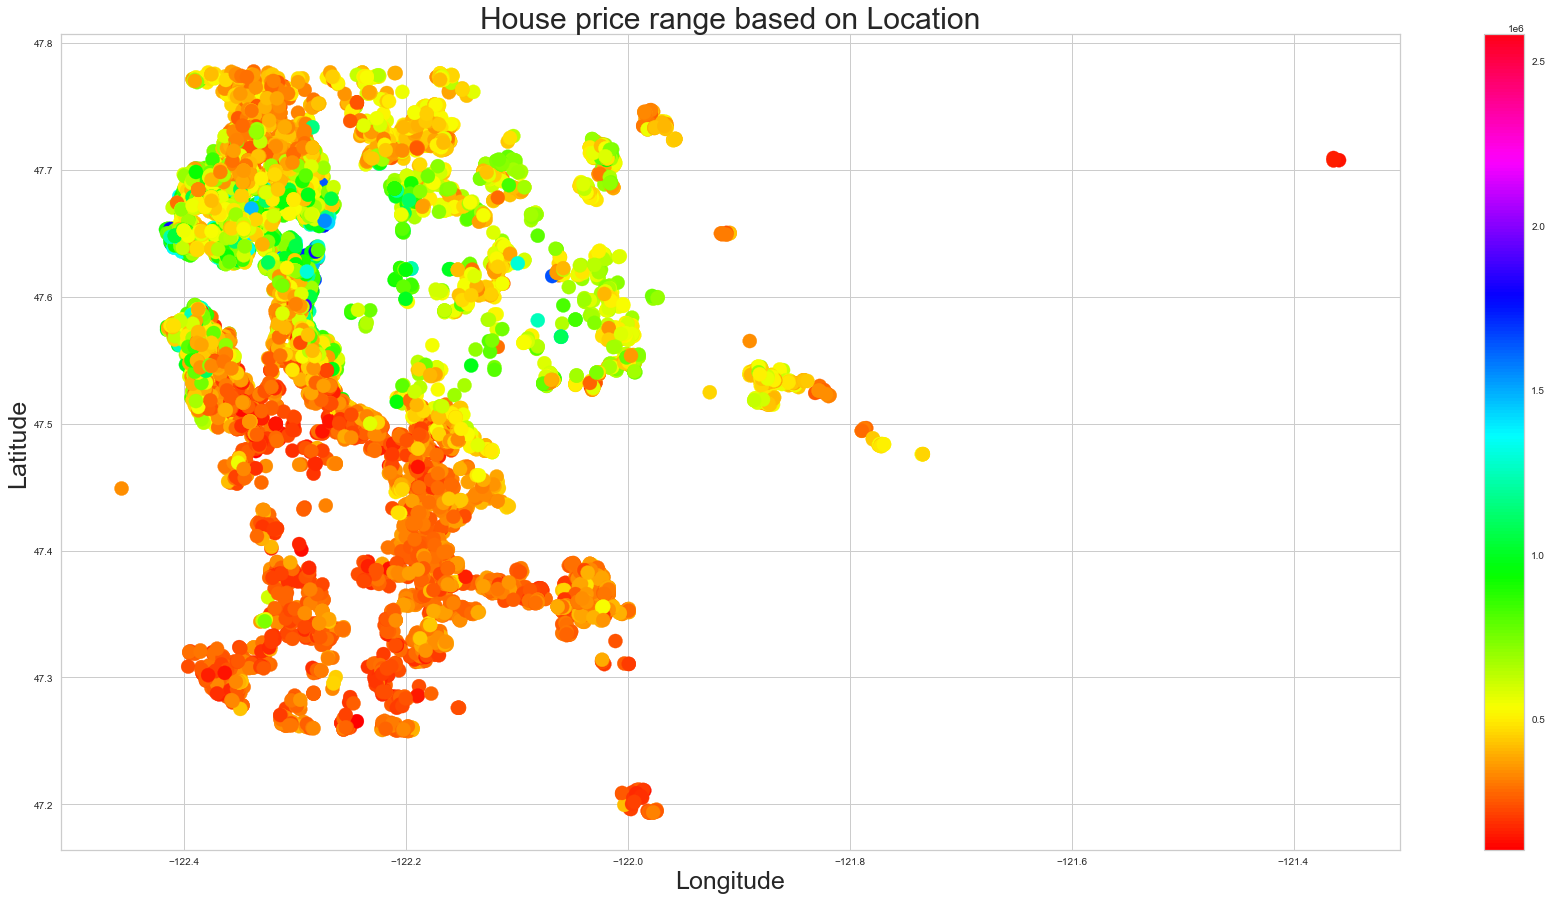

In [134]:
# Visualizing Longitude to Latitude to check how the price vary by location
plt.figure(figsize= (30, 15))
plt.scatter(x=df['long'], y=df['lat'], c=df['price'], cmap='hsv', marker='o',s=200)
plt.title('House price range based on Location',fontsize=30)
plt.xlabel('Longitude',fontsize=25)
plt.ylabel('Latitude',fontsize=25)
plt.colorbar()
plt.show;

## 2. What are the top ten zip codes that have the highest selling houses in King County?


After looking up the corresponding cities to each zip code, the top ten selling cities in terms of the price mean are Bellevue, Seattle, Mercer Island, Cottage Lake, Maltby, Union Hill-Novelty Hill, Sammamish.

In [135]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).head(10)
top_ten.head(20)

zipcode
98004    876144.950000
98112    853475.984694
98109    790953.826531
98119    770200.748503
98040    765300.000000
98102    738225.533333
98105    730829.549451
98077    705000.000000
98075    678133.288462
98199    676242.224000
Name: price, dtype: float64

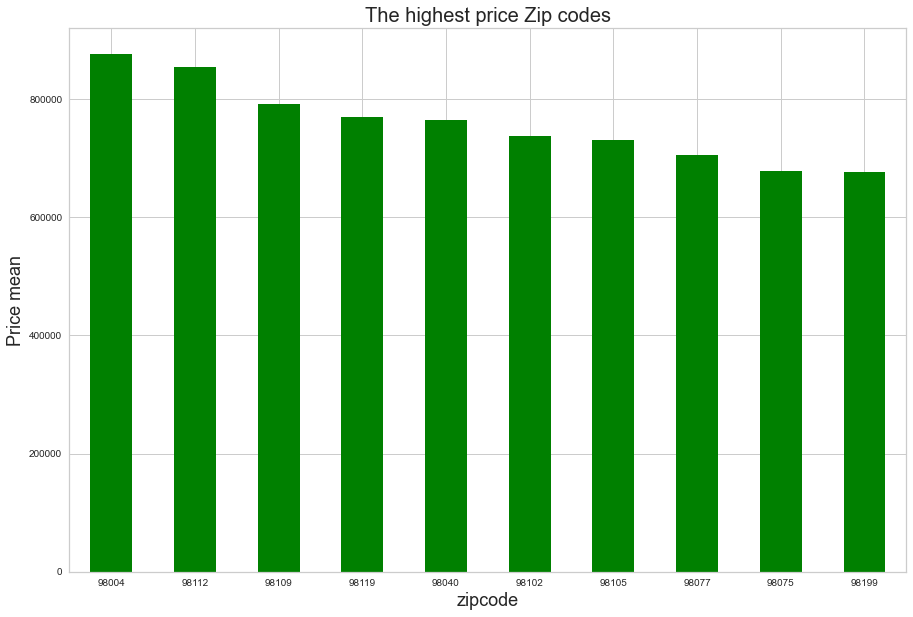

In [136]:
# plot top 10 highest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='green', figsize=(15,10))
plt.title('The highest price Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.show()

### 3. What are the top ten affordable zip codes in King County?
After looking up the corresponding cities to each zip code, the most affordable cities in terms of the price mean are Tukwila, Auburn, Numclaw, Wabash, Birch, Krain, Cumberland, Bayne, Osceola, Maywood, Upper Mill, Bayne Junction, Boise, Veazie, Naco, Stampede,Kent, Lakeland North, Black Diamond, Franklin, and more



In [137]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=True).head(10).head(10)
top_ten.head(20)


zipcode
98168    223467.465753
98002    230126.106557
98022    238203.108696
98032    241732.434783
98010    244655.000000
98023    259564.941176
98198    261583.513274
98001    270265.829630
98014    270400.000000
98003    271748.489583
Name: price, dtype: float64

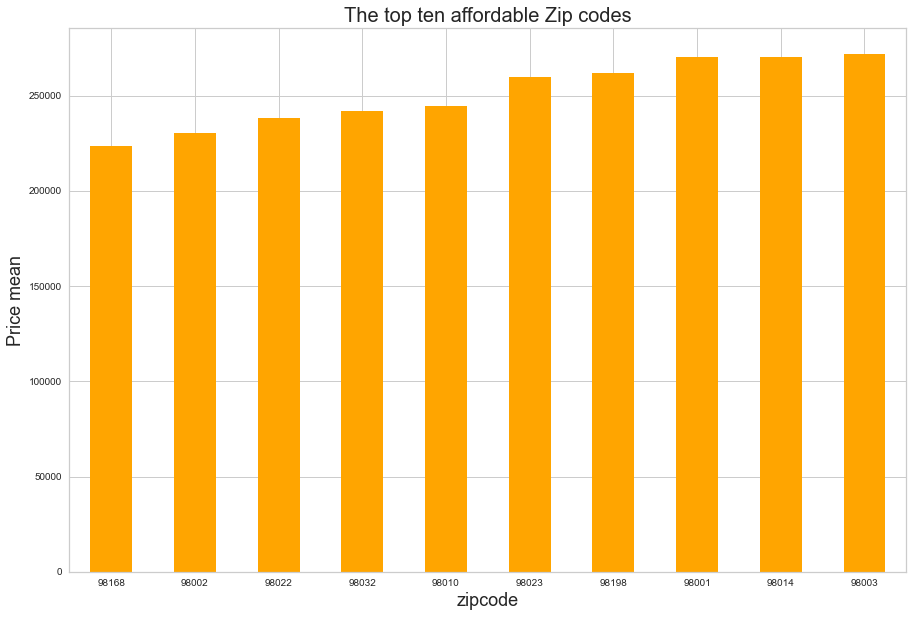

In [138]:
# plot top 10 lowest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='orange', figsize=(15,10))
plt.title('The top ten affordable Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.show()

### 4. Which features are important to predict the price of the house?

<Figure size 1440x1440 with 0 Axes>

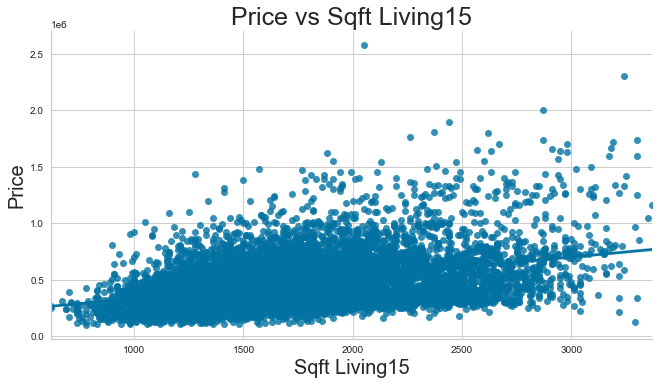

In [139]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living15", y="price",aspect=1.8,data=df)
plt.title("Price vs Sqft Living15",fontsize=25)
sqf.set_xlabels("Sqft Living15",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

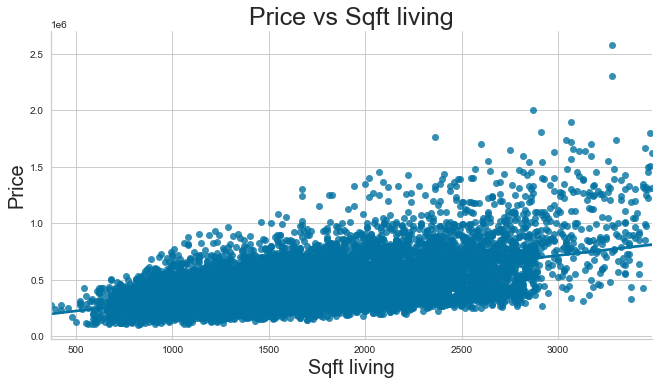

In [140]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=df)
plt.title("Price vs Sqft living",fontsize=25)
sqf.set_xlabels("Sqft living",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

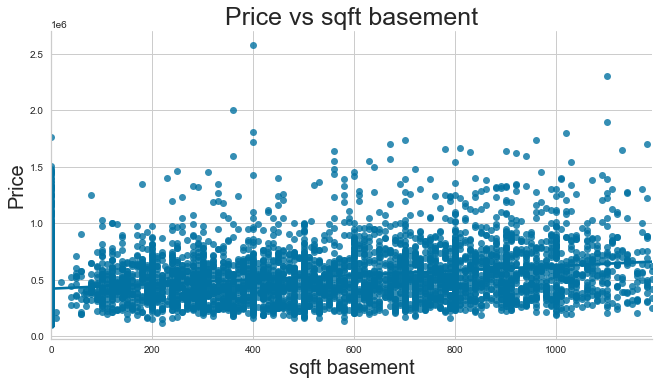

In [141]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_basement", y="price",aspect=1.8,data=df)
plt.title("Price vs sqft basement",fontsize=25)
sqf.set_xlabels("sqft basement",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

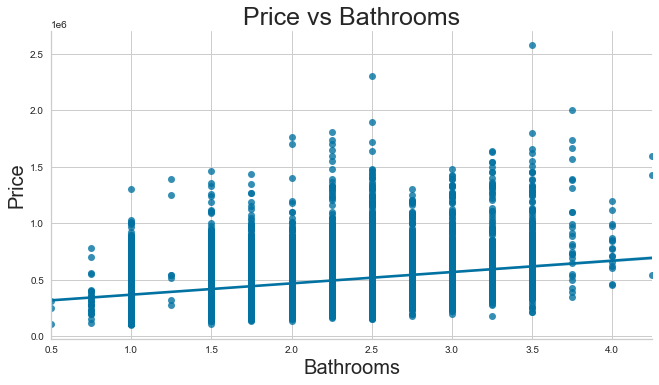

In [142]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="bathrooms", y="price",aspect=1.8,data=df)
plt.title("Price vs Bathrooms",fontsize=25)
sqf.set_xlabels("Bathrooms",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

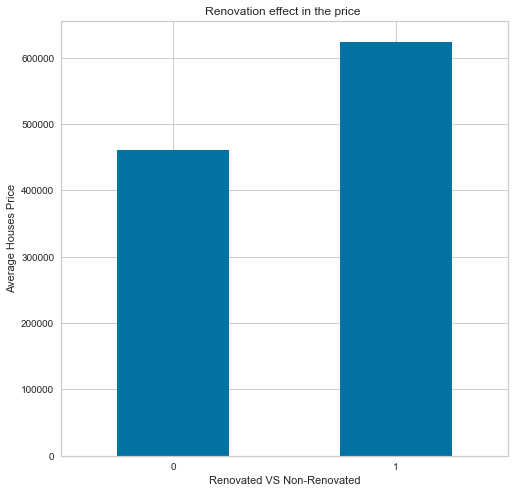

In [143]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price ")
plt.ylabel("Average Houses Price")
plt.xlabel("Renovated VS Non-Renovated")
plt.xticks(rotation=0)
#the renovated houses selling price is higher than non-renovated one 

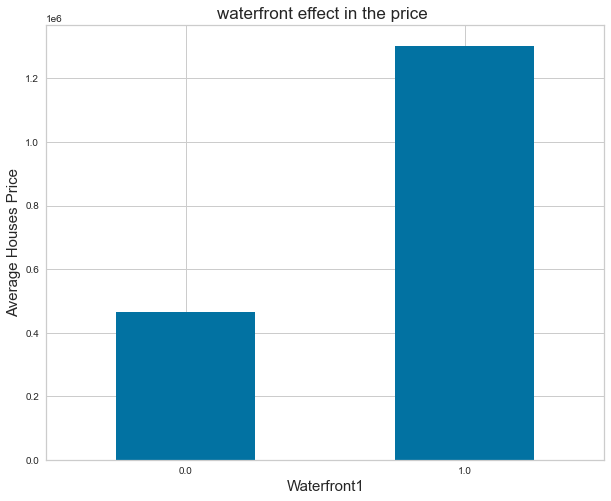

In [144]:
# plotting houses to the mean of price
df.groupby("waterfront1")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront1",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront


<Figure size 1440x1440 with 0 Axes>

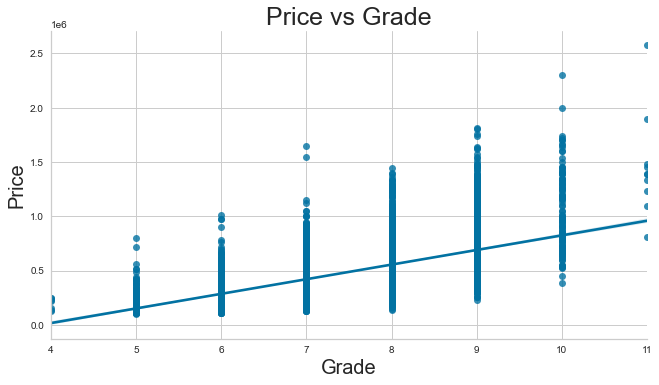

In [145]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="grade", y="price",aspect=1.8,data=df)
plt.title("Price vs Grade",fontsize=25)
sqf.set_xlabels("Grade",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

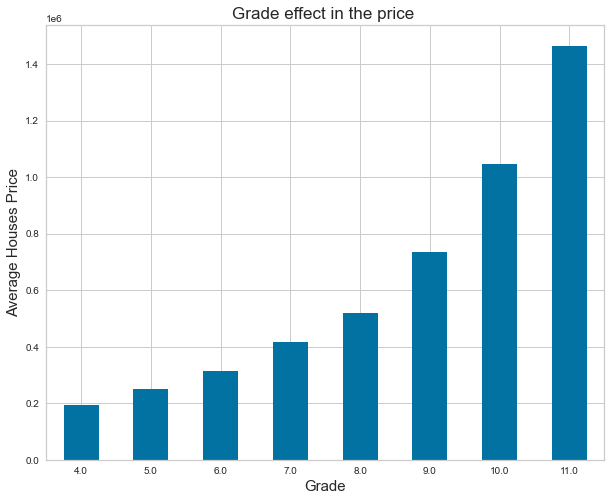

In [146]:
# plotting houses to the mean of price
df.groupby("grade")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("Grade effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Grade",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront


### Conclusions


- I organized my notebook by using OSMEN data science method to deal with the king county dataset.


- I cleaned the data, removed the null values, limit each feature of the data to get rid of the outlier as much as possible, and checked for Multicollinearity.


- For the baseline model, I train test split the data and got a R2 score of 0.11, for the Normality assumption the residuals were heteroscedastic.


- For the second model, I train test split the data ,  I made all the features fit with sm.ols, after adding all the features, I observed an increase in the R2 value, R2=0.678 but 3 problems were detected.
- A- numerical/categorical
- B-multicollinearity
- C- Distribution of veriables


- For the third model, I dropped the zipcode which is meaningless at first,
  The meaningless p value also affects the age of the building, as well as the coefficient, to   a large extent.
  In order to eliminate the meaninglessness of the price increase as the building age increases, the building age has been subtracted from 2022.

  The meaningless basement dummy was made with the where method.

  Although R2 did not make a difference with model 2, RMSE_All decreased and meaningless values were improved.

- As you know, we made a zipcode drop in model 3, dummifying the zipcode with one-hot encoding method.

  As in model3, the building was aged again, the basement dummy was made, and the recovered one-hot codes were split.

  We check that the train test sets have the same zipcode houses.

  model4= R2= 0.788 increased and at the same time RMSE_All=105758 error decreased.

  Multicollinearity: For the multicollinearity problem we detected in model2, we gave up one of the stack[91] binaries we obtained above.

  sqft_livin15, sgftlot has been dropped.
  It was observed that the coefficients were better and the p values were more significant.


- Log transform was performed for the unsymmetrical dependent and independent features that we detected in model2.
  Even though there was a decrease like R2=0.711, the coefficients were more meaningful and    readable.

  p values except long and renoveted were significant, decreased to RMSE_All=1211127
- The price of the house is highly affected by its location.
- [119],[120] column log transform before and after the distribution was checked.
  After log transform, it was observed that the features were distribution symmetrical.

- Houses with larger living space, bigger basement, and more bathrooms have higher predicted price.


- The houses with waterfront have higher selling prices than the ones without one.
- QQ plot TrainR2= 0.678
          TestR2=0.663 plots looks good
- The price of the house is highly efffected by its location
- Hous with larger living space, bigger basement more bathrooms have higher predict price
- The house with waterfront have higher selling price than the ones


### Limitaion

- The size of the dataset, a lot of features don't have a linear relationship with the target. Maybe a different non-linear model would work better.

### Future work


Use APIs to get King county school district data and link it with the zip codes.


In [147]:
# # Step1 Second trial
# # One-hot encoding (dummifying zipcodes)
# zipcode_onehot = pd.get_dummies(X_train.zipcode)
# z_colnames = ['zip_'+ str(i) for i in zipcode_onehot.columns]
# zipcode_onehot.columns = z_colnames
# X_train_st1 = X_train.join(zipcode_onehot)

# X_train_step1 = X_train_st1.drop(columns = ['zipcode'])
# X_train_step1['built_age'] = 2022 - X_train_step1.yr_built
# X_train_step1['basement_dummy'] = np.where(X_train_step1.sqft_basement > 0 ,1 ,0)
# X_train_step1 = X_train_step1.drop(columns = ['yr_built','sqft_basement'])

# zipcode_onehot_test = pd.get_dummies(X_test.zipcode)
# z_colnames = ['zip_'+ str(i) for i in zipcode_onehot_test.columns]
# zipcode_onehot_test.columns = z_colnames
# X_test_st1 = X_test.join(zipcode_onehot_test)

# X_test_step1 = X_test_st1.drop(columns = ['zipcode'])
# X_test_step1['built_age'] = 2022 - X_test_step1.yr_built
# X_test_step1['basement_dummy'] = np.where(X_test_step1.sqft_basement > 0 ,1 ,0)
# X_test_step1 = X_test_step1.drop(columns = ['yr_built','sqft_basement'])


# X_train_step1 = add_constant(X_train_step1)
# X_test_step1 = add_constant(X_test_step1)
# model_step1 = sm.OLS(y_train, X_train_step1).fit()
# print(model_step1.summary())
# y_pred_step1=model_step1.predict(X_test_step1)


# error_step1 = y_pred_step1 - y_test
# squared_error_step1 = error_step1**2
# rmse_step1 = squared_error_step1.mean() ** 0.5

# print('RMSE_all:', rmse_step1)